In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import datetime
from matplotlib.ticker import ScalarFormatter
from pylab import rcParams

In [2]:
url = "https://api.coingecko.com/api/v3/coins/cardano/market_chart/range?vs_currency=usd&from=1392577232&to=1892577232"
data = requests.get(url).json()
df = pd.DataFrame.from_dict(data)
df

,prices,market_caps,total_volumes
0,"[1508284800000, 0.02684535467621909]","[1508284800000, 696021404.3079604]","[1508284800000, 2351678.122306208]"
1,"[1508371200000, 0.026829950465728686]","[1508371200000, 695622018.2559936]","[1508371200000, 2815155.9695999967]"
2,"[1508457600000, 0.030299606216252807]","[1508457600000, 785580027.6424098]","[1508457600000, 8883473.082062634]"
3,"[1508544000000, 0.028587962639027336]","[1508544000000, 741202123.8797704]","[1508544000000, 5308856.917095766]"
4,"[1508630400000, 0.027796038407662104]","[1508630400000, 720669848.4724126]","[1508630400000, 2901876.1220860113]"
...,...,...,...
1314,"[1621814400000, 1.32881807075249]","[1621814400000, 42338798442.81028]","[1621814400000, 8825869340.678139]"
1315,"[1621900800000, 1.543146196143331]","[1621900800000, 49369920022.31968]","[1621900800000, 7596677080.276528]"
1316,"[1621987200000, 1.5463792548176887]","[1621987200000, 49752398756.771515]","[1621987200000, 6199929363.120314]"
1317,"[1622073600000, 1.7772759637277098]","[1622073600000, 56286220346.17397]","[1622073600000, 7062731108.257343]"


In [3]:
def limpeza_dados_preco(prices, marketcaps, volumes):
    
    # Novas variáveis globais para limpeza dos dados e cração de um novo dataframe
    # A conversão para uma variável "global" serve para essa variável se tornar "pública" e poder ser usada fora da função
    global cleanprices, cleanmarketcap, cleanvolume, cleandate
    cleanprices = []
    cleanmarketcap = []
    cleanvolume = []
    cleandate = []
    
    #Loop para limpeza dos dados
    for i in range(len(prices)):
        marketcap = marketcaps[i]
        price = prices[i]
        volume = volumes[i]
        epoch_time = price [0]
        
        #Adicionar integers de preço, volume e marketcap sem integers de tempo epoch a mais
        cleanmarketcap.append(marketcap[1])
        cleanvolume.append(volume[1])
        cleanprices.append(price[1])
        cleandate.append(epoch_time/1000)

#Criação de dicionairio "adausd" para o data frame usando os dados limpos, mais organizados e corretos
limpeza_dados_preco(df["prices"], df["market_caps"], df["total_volumes"])
adausd = {"Data":cleandate, 
          "ADAUSD":cleanprices,
          "MarketCap":cleanmarketcap, 
          "Volume":cleanvolume}

#Criação da nova dataframe.
df_ada_prices = pd.DataFrame(data=adausd)

#Começar index com 1 indicando o dia
df_ada_prices.index += 1

#Converter tempo epoch em tempo ISO 8601 para ser percetível a qualquer humano ler a data
df_ada_prices["Data"] = pd.to_datetime(df_ada_prices["Data"], unit="s")

#Dado em falta: nao existe dado de Marketcap para o dia 02 de Abril de 2017, ficando assim em 0, no dia/index 1187 (df_ada_prices.loc[1187])
df_ada_prices

,Data,ADAUSD,MarketCap,Volume
1,2017-10-18,0.026845,6.960214e+08,2.351678e+06
2,2017-10-19,0.026830,6.956220e+08,2.815156e+06
3,2017-10-20,0.030300,7.855800e+08,8.883473e+06
4,2017-10-21,0.028588,7.412021e+08,5.308857e+06
5,2017-10-22,0.027796,7.206698e+08,2.901876e+06
...,...,...,...,...
1315,2021-05-24,1.328818,4.233880e+10,8.825869e+09
1316,2021-05-25,1.543146,4.936992e+10,7.596677e+09
1317,2021-05-26,1.546379,4.975240e+10,6.199929e+09
1318,2021-05-27,1.777276,5.628622e+10,7.062731e+09


In [4]:
df_ada_prices.to_csv("cardano_price_marketcap_volume_20171018_20210528.csv", index=False)

# Gráfico de preço hitórico entre 2018 e 2021

Criação de gráfico de preço e volume, um em cima do outro usando "subplot array" para separar os dois gráficos. Para melhor interpretação dos gráficos foi escolhido um simples gráfico de linhas para a representação do preço e um gráfico de barras para a representação do volume de compra e venda da moeda virtual denominada por "cardano".

<IPython.core.display.Javascript object>


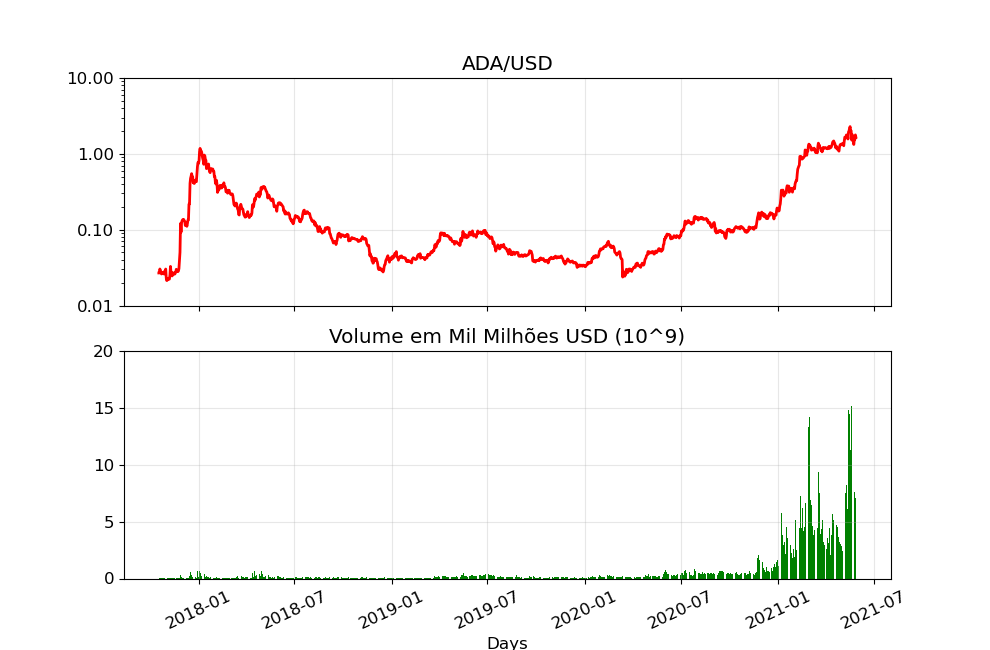

In [5]:
%matplotlib notebook
f, axarr = plt.subplots(2, sharex=True)

axarr[0].set_title("ADA/USD")
axarr[0].plot(df_ada_prices["Data"], 
              df_ada_prices["ADAUSD"], 
              label = "ADA/USD", 
              linewidth = "2",
              color = "r")

axarr[1].set_title("Volume em Mil Milhões USD (10^9)")
axarr[1].bar(df_ada_prices["Data"], 
             df_ada_prices["Volume"]/1000000000, 
             color = "g",
             label = "MarketCap")

# rcParams neste caso serve para controlar o tamanho da imagem renderizada e do texto
rcParams['figure.figsize'] = 9.9, 6.5
rcParams['font.size'] = 12
rcParams['figure.dpi'] = 100

# ticklabel_format foi necessário para apresentar o eixo y de volume em notação normal, pois em autmoático apresentava 
# sempre em notação científica 
plt.xlabel("Days")

# set_yscale("log") para usar escala logarítmica na atuação do preço
axarr[0].set_yscale("log")
axarr[0].set_yticks([0.01, 0.1, 1, 10])

# as três linhas de código abaixo foram necessárias para não usar notação cientifica nas labels do gráfico de preço
axarr[0].get_yaxis().set_major_formatter(ScalarFormatter())
axarr[0].ticklabel_format(axis="y", style='plain')
plt.yticks([0, 5, 10, 15, 20])
plt.ticklabel_format(axis="y", style='plain')
plt.xticks(rotation = 25)

axarr[0].grid(alpha=0.3)
plt.grid(alpha=0.3)

# Calculo de ROI anual

De modo a fazer o cálculo de "Return on Investment" tivemos que obter, da base de dados inicial, os dados necessários para os cáclculos de ROI de 30, 60, 90 dias e anual. Para isso algumas listas de controlo foram criadas como, "iniciais_anuais", "preços_anuais" e "iniciais".  

A forma de cálculo do ROI é simples, após obter os dados corretos, usando a seguinte fórmula: (Receita - Custo)/Custo*100. O ROI calculado nao tem em conta taxas que possam ser aplicadas pela Casa de Câmbio usada

In [6]:
# Lista de controlo para obter os preços do dia 1 de cada ano
iniciais_anuais = ['2021-01-01 00:00:00', 
                   '2020-01-01 00:00:00', 
                   '2019-01-01 00:00:00', 
                   '2018-01-01 00:00:00']

# Lista para uso no gráfico como eixo horizontal
anos = [2018, 2019, 2020]

# Lista vazia para obter os preços do dia 1 de cada ano
preços_anuais = []

# Loop for para obter os preços do dia 1 de cada ano
for i in range(len(df_ada_prices)):
    if str(df_ada_prices.loc[i+1]["Data"]) in iniciais_anuais:
        preços_anuais.append(df_ada_prices.loc[i+1]["ADAUSD"])

# Cálculo de ROI em cada ano, utilizando o preço inicial do ano em que comprou e o preço do ano seguinte
roi_anual = []
for i in range(len(preços_anuais)):
    # If statement para parar o loop e nao tentar calcular o ROI do ano 2021, daría erro por nao haver ainda preço 
    # do dia 01-01-2022
    if i+1 > len(preços_anuais)-1:
        break
    roi = (preços_anuais[i+1]-preços_anuais[i])/preços_anuais[i]*100
    roi_anual.append(roi)
    
# Eliminar peço 2021 para colocar no dataframe
preços_anuais.pop()

# Criação de Dataframe
ROI_anual_dict = {"Ano":anos, "ROI":roi_anual, "Preço Inicial":preços_anuais}

# Criação dataframe limpa.
ROI_anual = pd.DataFrame(data=ROI_anual_dict)

# Começar index com 1 indicando o dia
ROI_anual.index += 1

# Média Anual para criação de linha horizontal com o ROI médio durante a amostra dos 7 anos
média_roi_anual = ROI_anual["ROI"].mean()
ROI_anual

,Ano,ROI,Preço Inicial
1,2018,-94.574356,0.747140
2,2019,-18.810511,0.040537
3,2020,453.207116,0.032912


In [7]:
ROI_anual.to_csv("cardano_roi_anual_2018-2020.csv", index=False)

# Representação gráfica de ROI Anual

<IPython.core.display.Javascript object>


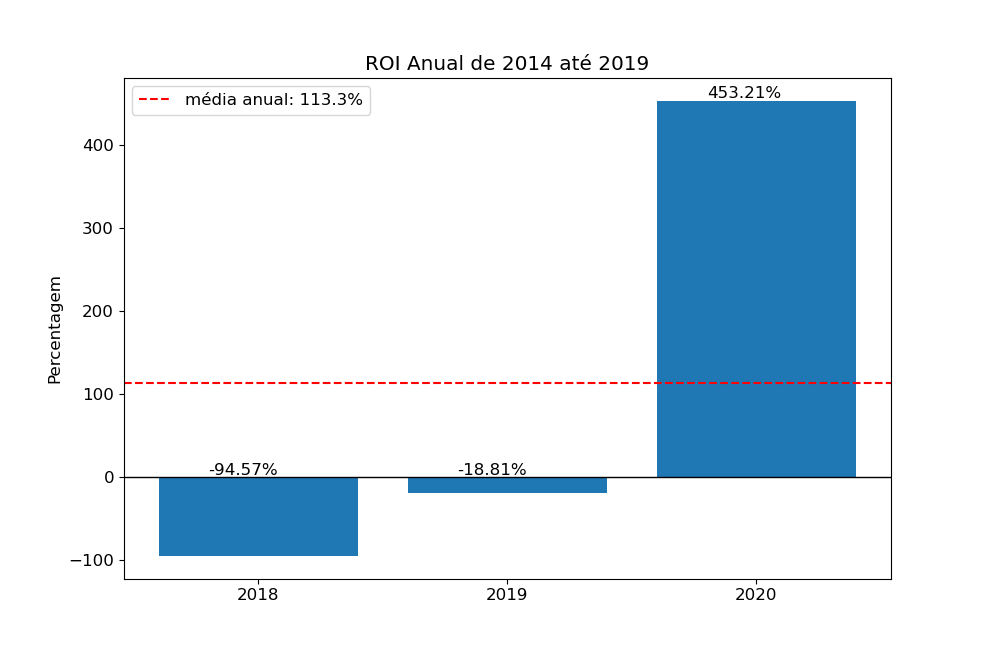

In [16]:
fig, ax = plt.subplots()

ax.bar(ROI_anual["Ano"], ROI_anual["ROI"])
ax.set_xticks([2018, 2019, 2020])

# Criação da linha horizontal de média
plt.axhline(y = média_roi_anual, color = 'r', linestyle = 'dashed', label = "média anual: "+str(round(média_roi_anual, 1))+"%")  

ax.legend()
plt.ylabel('Percentagem')
plt.axhline(y = 0, color = 'black', linewidth=1)

# Loop para obter o numero exato em percentagem de ROI anual em formato de texto colocado em cima de cada barra
for i, v in enumerate(ROI_anual["ROI"]):
    # If statement para caso roi seja negativo para colocar o texto logo acima da linha y=0
    if v < 0:
        v = 0
    plt.text(ROI_anual["Ano"][i+1]-0.20, v+3, str(round(ROI_anual["ROI"][i+1],2))+'%')

plt.title('ROI Anual de 2014 até 2019')
plt.show()

# Cálculo de ROI de 30, 60 e 90 Dias.

In [7]:
# Lista de controlo para obter os preços do dia 1 de cada mês, dividido por "nested lists" por ano
iniciais = [
    ['2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00', '2020-04-01 00:00:00','2020-05-01 00:00:00','2020-06-01 00:00:00','2020-07-01 00:00:00','2020-08-01 00:00:00','2020-09-01 00:00:00','2020-10-01 00:00:00','2020-11-01 00:00:00','2020-12-01 00:00:00'], 
    ['2019-01-01 00:00:00','2019-02-01 00:00:00','2019-03-01 00:00:00','2019-04-01 00:00:00','2019-05-01 00:00:00','2019-06-01 00:00:00','2019-07-01 00:00:00','2019-08-01 00:00:00','2019-09-01 00:00:00','2019-10-01 00:00:00','2019-11-01 00:00:00','2019-12-01 00:00:00'],
    ['2018-01-01 00:00:00','2018-02-01 00:00:00','2018-03-01 00:00:00','2018-04-01 00:00:00','2018-05-01 00:00:00','2018-06-01 00:00:00','2018-07-01 00:00:00','2018-08-01 00:00:00','2018-09-01 00:00:00','2018-10-01 00:00:00','2018-11-01 00:00:00','2018-12-01 00:00:00'],
]

# Lista de meses para uso gráfico
meses = ["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out","Nov","Dez"]

# Função para o cálculo de ROI, com quantidade de dias variável, mensal.
def ROIcalculator(dias, df_ada_prices, ano):
    
    # Novas variáveis globais para limpeza dos dados e cração de um novo dataframe
    # A conversão para uma variável "global" serve para essa variável se tornar "pública" e poder ser usada fora da função
    global roixdias
    
    # Lista de resultador final para o ROI
    roixdias = []
    for i in range(1, len(df_ada_prices)):
        
        # If statements para seleção da lista controlo de acordo com o ano escolhido
        if ano == 2020:
            inicial_de_cada_mes = iniciais[0]
        if ano == 2019:
            inicial_de_cada_mes = iniciais[1]
        if ano == 2018:
            inicial_de_cada_mes = iniciais[2]           
        # If statement para uso da lista controlo
        if str(df_ada_prices.loc[i]["Data"]) in inicial_de_cada_mes:
            
            # Fórmula para o cálculo de ROI
            roi = (df_ada_prices.loc[i+dias]["ADAUSD"]-df_ada_prices.loc[i]["ADAUSD"])/df_ada_prices.loc[i]["ADAUSD"]*100
            roixdias.append(roi)

In [8]:
# Criação de Dataframes para ROI 30, 60 e 90 dias
roi90mensal = pd.DataFrame(data=meses, columns=["Meses"])
roi60mensal = pd.DataFrame(data=meses, columns=["Meses"])
roi30mensal = pd.DataFrame(data=meses, columns=["Meses"])
roi90mensal.index += 1
roi60mensal.index += 1
roi30mensal.index += 1

# Loop para criação de colunas nos dataframes de acordo com o ano
for i in range(2018, 2021):
    # Loop para criação de colunas nos dataframes de acordo com o numero de dias de ROI
    for dias in [30, 60, 90]:
        # Uso da função anterior para o cáculo de ROI
        ROIcalculator(dias, df_ada_prices, i)
        # If statements para controlar em que dataframes são criadas as colunas (roi30mensal, roi60mensal ou roi90mensal)
        if dias == 30:
            roi30mensal["ROI "+str(dias)+" Dias "+str(i)] = roixdias
        elif dias == 60:
            roi60mensal["ROI "+str(dias)+" Dias "+str(i)] = roixdias
        elif dias == 90:
            roi90mensal["ROI "+str(dias)+" Dias "+str(i)] = roixdias

# ROI 90 dias médio durante 2020, 2019, 2018
roi90mensal["ROI 90 Dias Médio"] = (roi90mensal["ROI 90 Dias 2020"] + 
                                    roi90mensal["ROI 90 Dias 2019"] + 
                                    roi90mensal["ROI 90 Dias 2018"]) /4

# ROI 60 dias médio durante 2020, 2019, 2018, 2017, 2016, 2015 e 2014
roi60mensal["ROI 60 Dias Médio"] = (roi60mensal["ROI 60 Dias 2020"] + 
                                    roi60mensal["ROI 60 Dias 2019"] + 
                                    roi60mensal["ROI 60 Dias 2018"]) /4
# ROI 30 dias médio durante 2020, 2019, 2018, 2017, 2016, 2015 e 2014
roi30mensal["ROI 30 Dias Médio"] = (roi30mensal["ROI 30 Dias 2020"] + 
                                    roi30mensal["ROI 30 Dias 2019"] + 
                                    roi30mensal["ROI 30 Dias 2018"]) /4

roi90mensal

,Meses,ROI 90 Dias 2018,ROI 90 Dias 2019,ROI 90 Dias 2020,ROI 90 Dias Médio
1,Jan,-79.183035,72.643001,-9.090776,-3.907703
2,Fev,-28.654146,79.369372,-10.845968,9.967315
3,Mar,-33.546636,112.493493,35.980985,28.731960
4,Abr,-19.551725,29.256603,178.189845,46.973681
5,Mai,-52.125958,-13.371565,190.884595,31.346768
6,Jun,-53.051041,-50.321786,56.619651,-11.688294
7,Jul,-39.036182,-53.557269,20.450341,-18.035778
8,Ago,-51.292003,-32.304910,-31.534486,-28.782849
9,Set,-59.070548,-8.240304,36.239427,-7.767856
10,Out,-52.286874,-12.047072,90.889370,6.638856


In [11]:
roi90mensal.to_csv("cardano_roi_90_dias_mensal_2018-2020.csv", index=False)

# Representação gráfica de ROI de 90 dias mensal médio

## Tamanho de amostras para o estudo: 
Foi usado dados diários a partir do dia 1 de Janeiro de 2014 até 1 de Janeiro de 2021

<IPython.core.display.Javascript object>


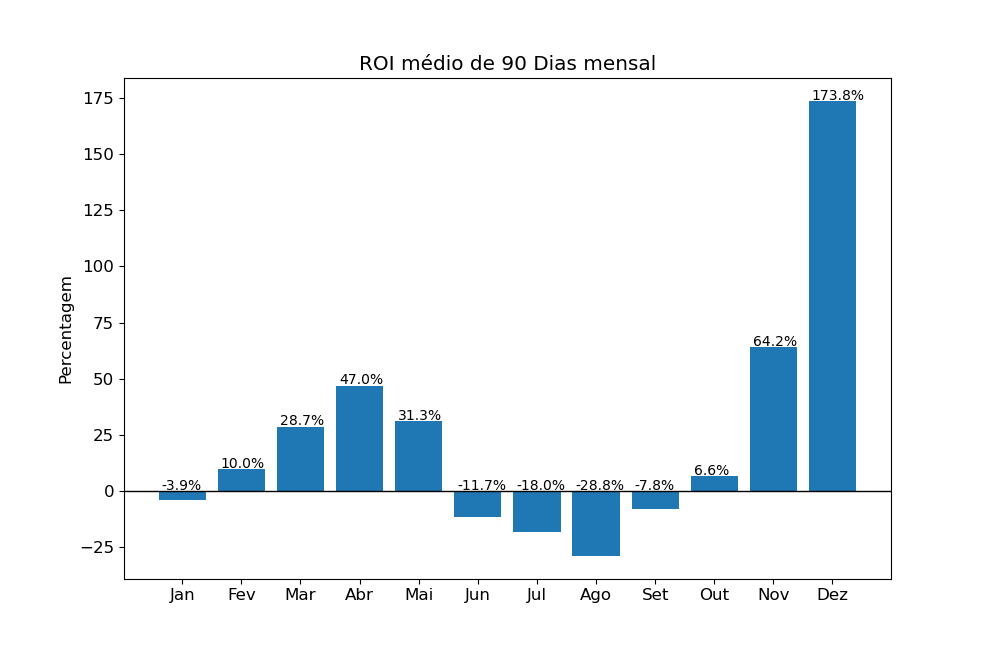

In [9]:
fig, ax = plt.subplots()

ax.bar(roi90mensal["Meses"], 
        roi90mensal["ROI 90 Dias Médio"], 
        label = "ROI 90 Dias Médio")


plt.ylabel('Percentagem')
plt.axhline(y = 0, color = 'black', linewidth=1)

# Loop para obter o numero exato em percentagem de ROI anual em formato de texto colocado em cima de cada barra
for i, v in enumerate(roi90mensal["ROI 90 Dias Médio"]):
    # If statement para caso roi seja negativo para colocar o texto logo acima da linha y=0
    if v < 0:
        v = 0
    plt.text(i-0.35, v+0.5, str(round(roi90mensal["ROI 90 Dias Médio"][i+1],1))+'%', fontsize=10)

plt.title('ROI médio de 90 Dias mensal')
plt.show()

In [13]:
roi60mensal

,Meses,ROI 60 Dias 2018,ROI 60 Dias 2019,ROI 60 Dias 2020,ROI 60 Dias Médio
1,Jan,-59.869747,5.853570,43.911877,-2.526075
2,Fev,-69.638372,89.560081,-44.073943,-6.038058
3,Mar,18.719024,50.168528,8.689841,19.394348
4,Abr,36.317168,21.310639,149.545124,51.793233
5,Mai,-63.328135,29.882936,74.507656,10.265614
6,Jun,-31.420808,-33.365447,89.252465,6.116553
7,Jul,-23.576191,-46.454867,40.304963,-7.431524
8,Ago,-40.878268,-41.662343,-27.219467,-27.440019
9,Set,-31.530974,-6.982922,-23.701727,-15.553906
10,Out,-50.871764,6.165919,64.688724,4.995720


In [14]:
roi60mensal.to_csv("cardano_roi_60_dias_mensal_2014-2020.csv", index=False)

# Representação gráfica de ROI de 60 dias mensal médio¶
## Tamanho de amostras para o estudo:
Foi usado dados diários a partir do dia 1 de Janeiro de 2014 até 1 de Janeiro de 2021

<IPython.core.display.Javascript object>


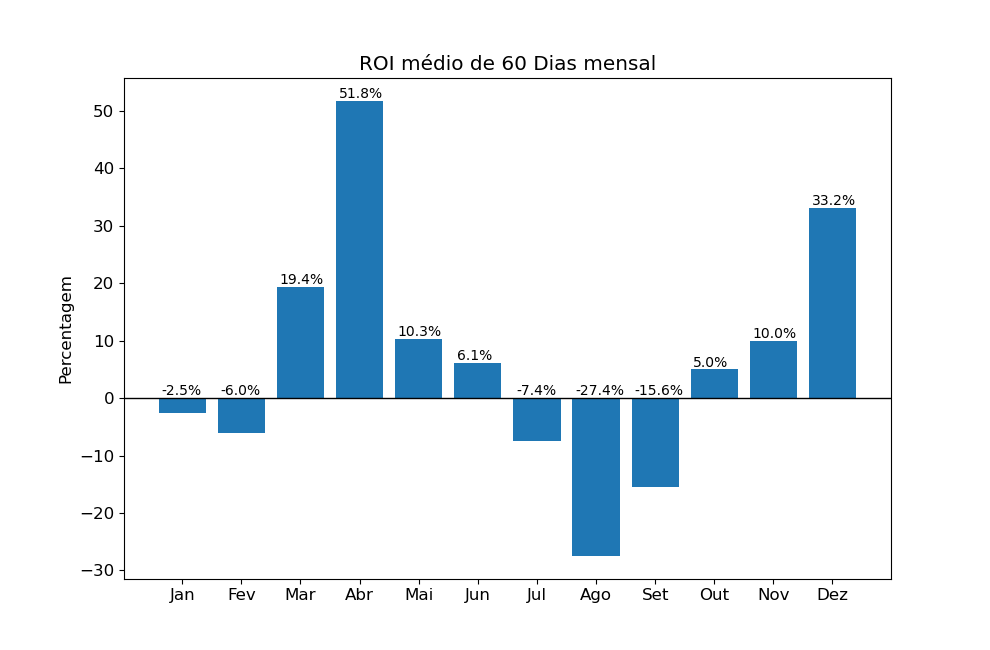

In [24]:
fig, ax = plt.subplots()

ax.bar(roi60mensal["Meses"], 
        roi60mensal["ROI 60 Dias Médio"], 
        label = "ROI 60 Dias Médio")


plt.ylabel('Percentagem')
plt.axhline(y = 0, color = 'black', linewidth=1)  

# Loop para obter o numero exato em percentagem de ROI anual em formato de texto colocado em cima de cada barra
for i, v in enumerate(roi60mensal["ROI 60 Dias Médio"]):
    # If statement para caso roi seja negativo para colocar o texto logo acima da linha y=0
    if v < 0:
        v = 0
    plt.text(i-0.355, v+0.5, str(round(roi60mensal["ROI 60 Dias Médio"][i+1],1))+'%', fontsize=10)

plt.title('ROI médio de 60 Dias mensal')
plt.show()

In [16]:
roi30mensal

,Meses,ROI 30 Dias 2018,ROI 30 Dias 2019,ROI 30 Dias 2020,ROI 30 Dias Médio
1,Jan,-32.848424,-2.765505,69.764888,8.537740
2,Fev,-41.654983,10.897832,-14.256010,-11.253290
3,Mar,-52.021612,67.811326,-36.829937,-5.260056
4,Abr,119.373286,-0.482229,59.414121,44.576294
5,Mai,-37.860634,21.898469,56.538908,10.144186
6,Jun,-38.567627,-7.221794,11.628019,-8.540350
7,Jul,11.633636,-28.178657,69.538496,13.248369
8,Ago,-29.476951,-29.977643,-15.765932,-18.805131
9,Set,-16.688537,-13.569536,-17.274587,-11.883165
10,Out,-17.815600,7.620708,-7.769245,-4.491034


In [17]:
roi30mensal.to_csv("cardano_roi_30_dias_mensal_2014-2020.csv", index=False)

# Representação gráfica de ROI de 30 dias mensal médio¶
## Tamanho de amostras para o estudo:
Foi usado dados diários a partir do dia 1 de Janeiro de 2014 até 1 de Janeiro de 2021

<IPython.core.display.Javascript object>


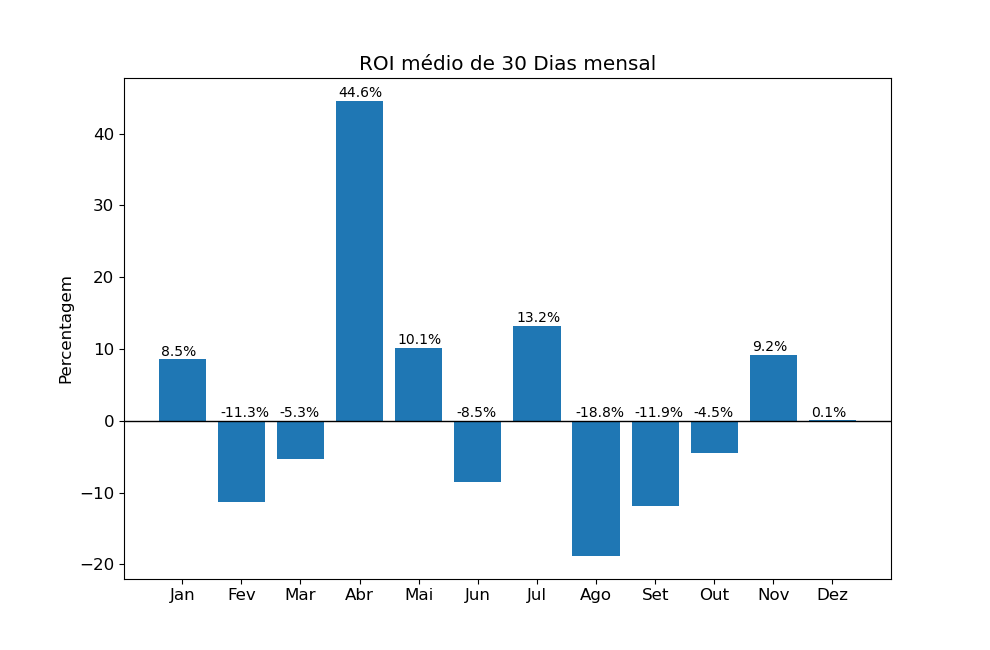

In [10]:
fig, ax=plt.subplots()

ax.bar(roi30mensal["Meses"], 
        roi30mensal["ROI 30 Dias Médio"], 
        label = "ROI 30 Dias Médio")


plt.ylabel('Percentagem')
plt.axhline(y = 0, color = 'black', linewidth=1)  

# Loop para obter o numero exato em percentagem de ROI anual em formato de texto colocado em cima de cada barra
for i, v in enumerate(roi30mensal["ROI 30 Dias Médio"]):
    # If statement para caso roi seja negativo para colocar o texto logo acima da linha y=0
    if v < 0:
        v = 0
    plt.text(i-0.355, v+0.5, str(round(roi30mensal["ROI 30 Dias Médio"][i+1],1))+'%', fontsize=10)

plt.title('ROI médio de 30 Dias mensal')
plt.show()

# Conclusão
A cryptomoeda "cardano" é bastante recente no mercado. Assim, não existe quantidade de preços históricos suficientes para uma análise conclusiva do preço da moeda.